# Kobe Bryant Shot Selection

## __1.Preparation__

#### Load libraries

In [106]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### __Load dataset__

In [107]:
data = pd.read_csv('~/github/Kobe_Bryant/data.csv')

data.csv is downloaded from Kaggle 
Link: https://www.kaggle.com/c/kobe-bryant-shot-selection/data

In [108]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [109]:
data.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

Some categorical fields are classified as numeric. Change types of some columns.

In [110]:
data['action_type']=data['action_type'].astype('category')
data['combined_shot_type']=data['combined_shot_type'].astype('category')
data['season']=data['season'].astype('category')
data['shot_type']=data['shot_type'].astype('category')
data['shot_zone_area']=data['shot_zone_area'].astype('category')
data['shot_zone_basic']=data['shot_zone_basic'].astype('category')
data['shot_zone_range']=data['shot_zone_range'].astype('category')
data['team_name']=data['team_name'].astype('category')
data['game_date']=data['game_date'].astype('category')
data['matchup']=data['matchup'].astype('category')
data['opponent']=data['opponent'].astype('category')
data['game_event_id']=data['game_event_id'].astype('category')
data['game_id']=data['game_id'].astype('category')
data['period']=data['period'].astype('category')
data['playoffs']=data['playoffs'].astype('category')
data['shot_made_flag']=data['shot_made_flag'].astype('category')
data['team_id']=data['team_id'].astype('category')
data['shot_id']=data['shot_id'].astype('category')


## __2. Summerize data__

Summerize data to have a understanding 

In [111]:
data.shape

(30697, 25)

There are 30697 records and 25 columns.

In [112]:
data.describe(include=[np.number])

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000


## __3. Visualize data__ 

Visualize data for understanding

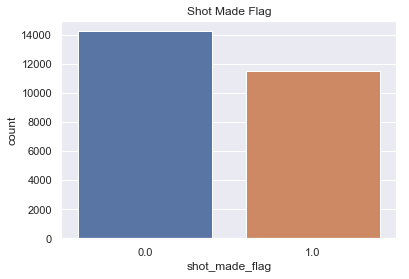

In [113]:
ax=plt.axes()
sns.set(style="darkgrid")
sns.countplot(x='shot_made_flag',data=data,ax=ax)
ax.set_title('Shot Made Flag')
plt.show()


In [114]:
loc_x_made=data[data['shot_made_flag']==1]['loc_x'].values.tolist()
loc_y_made=data[data['shot_made_flag']==1]['loc_y'].values.tolist()
loc_x_miss=data[data['shot_made_flag']==0]['loc_x'].values.tolist()
loc_y_miss=data[data['shot_made_flag']==0]['loc_y'].values.tolist()

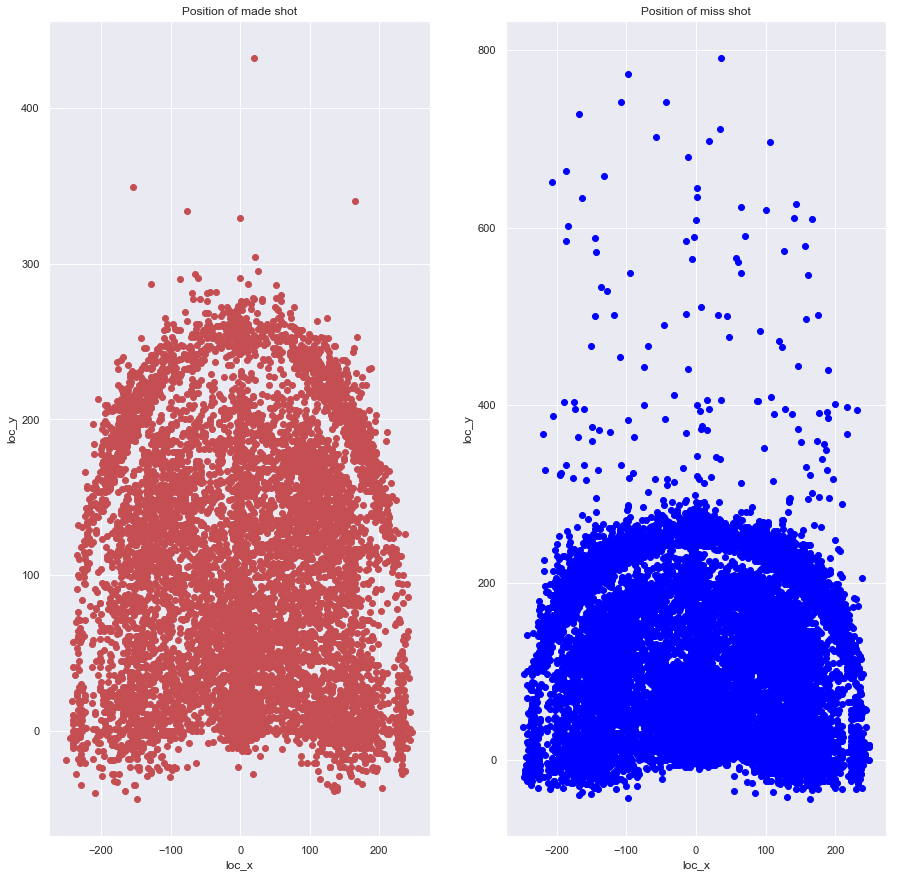

In [115]:
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(15,15))
ax1.scatter(loc_x_made, loc_y_made,c='r')
ax2.scatter(loc_x_miss, loc_y_miss,c='blue')
ax1.set_title('Position of made shot')
ax1.set_xlabel('loc_x')
ax1.set_ylabel('loc_y')
ax2.set_title('Position of miss shot')
ax2.set_xlabel('loc_x')
ax2.set_ylabel('loc_y')
plt.show()

Apparently when loc_y is larget then 300, there is a high possibility that the shot will miss. 

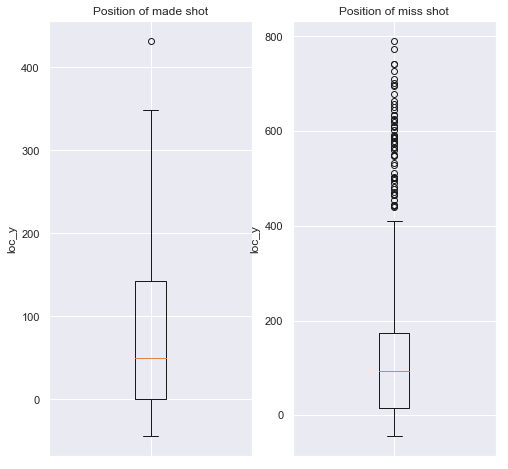

In [116]:
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(8,8))
ax1.boxplot(loc_y_made)
ax2.boxplot(loc_y_miss)
ax1.set_title('Position of made shot')
ax1.set_xticklabels('')
ax1.set_ylabel('loc_y')
ax2.set_title('Position of miss shot')
ax2.set_xticklabels('')
ax2.set_ylabel('loc_y')
plt.show()

From boxplot, this can also show loc_y is one of factor for considering if the shot was made.
Most made shots are within loc_y less than 300 

## __4. Data preparation__

Some columns contain unique information and therefore no predictive power
Need to inspect and delete from dataset before predicting

In [117]:
len(np.unique(data.shot_id))-len(data.shot_id)

0

In [118]:
len(np.unique(data.team_id))

1

In [119]:
len(np.unique(data.team_name))

1

shot_id is unique. Therefore shot_id can be deleted.

Thanks to Kobe's loyality, there is only one team_id and one team_name. Therefore these two fields have no predictive power.

In [120]:
del data['shot_id']
del data['team_id']
del data['team_name']

In [121]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR


lat and lon are possibly the same as loc_x and loc_y. Can use scatter plot to determine.

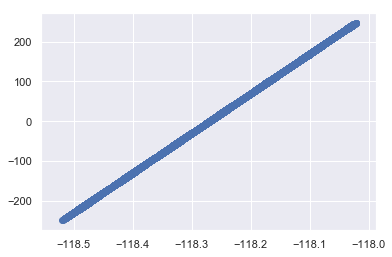

In [122]:
plt.scatter(data['lon'],data['loc_x'])

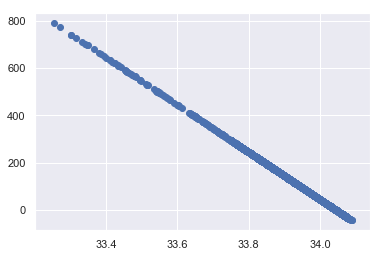

In [123]:
plt.scatter(data['lat'],data['loc_y'])

By scatter plots, lon and lat are the same as loc_x and loc_y respectively. Only one set is needed 

In [124]:
del data['lon']
del data['lat']

In [125]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
0,Jump Shot,Jump Shot,10,20000012,167,72,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,35,20000012,-101,135,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,43,20000012,138,175,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,155,20000012,0,0,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR


For simplicity, assume each shot is independent to other shots(although in reality, there may be some dependence between shots)
Therefore gave_event_id, game_id can be deleted 

In [126]:
del data['game_event_id']
del data['game_id']

Seems there are two columns describing opponent. Need to investigate which one should be used

In [127]:
np.unique(data['matchup'])

array(['LAL @ ATL', 'LAL @ BKN', 'LAL @ BOS', 'LAL @ CHA', 'LAL @ CHH',
       'LAL @ CHI', 'LAL @ CLE', 'LAL @ DAL', 'LAL @ DEN', 'LAL @ DET',
       'LAL @ GSW', 'LAL @ HOU', 'LAL @ IND', 'LAL @ LAC', 'LAL @ MEM',
       'LAL @ MIA', 'LAL @ MIL', 'LAL @ MIN', 'LAL @ NJN', 'LAL @ NOH',
       'LAL @ NOK', 'LAL @ NOP', 'LAL @ NYK', 'LAL @ OKC', 'LAL @ ORL',
       'LAL @ PHI', 'LAL @ PHO', 'LAL @ PHX', 'LAL @ POR', 'LAL @ SAC',
       'LAL @ SAS', 'LAL @ SEA', 'LAL @ TOR', 'LAL @ UTA', 'LAL @ UTH',
       'LAL @ VAN', 'LAL @ WAS', 'LAL vs. ATL', 'LAL vs. BKN',
       'LAL vs. BOS', 'LAL vs. CHA', 'LAL vs. CHH', 'LAL vs. CHI',
       'LAL vs. CLE', 'LAL vs. DAL', 'LAL vs. DEN', 'LAL vs. DET',
       'LAL vs. GSW', 'LAL vs. HOU', 'LAL vs. IND', 'LAL vs. LAC',
       'LAL vs. MEM', 'LAL vs. MIA', 'LAL vs. MIL', 'LAL vs. MIN',
       'LAL vs. NJN', 'LAL vs. NOH', 'LAL vs. NOK', 'LAL vs. NOP',
       'LAL vs. NYK', 'LAL vs. OKC', 'LAL vs. ORL', 'LAL vs. PHI',
       'LAL vs. PHO', 'LAL vs. 

In [128]:
np.unique(data['opponent'])

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN',
       'NOH', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC',
       'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS'], dtype=object)

In [129]:
matchup_opponent = np.unique([(lambda x : x[-3:])(x) for x in data['matchup']])

In [130]:
matchup_opponent

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN',
       'DET', 'GSW', 'HOU', 'IND', 'LAC', 'MEM', 'MIA', 'MIL', 'MIN',
       'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO',
       'PHX', 'POR', 'SAC', 'SAN', 'SAS', 'SEA', 'TOR', 'UTA', 'UTH',
       'VAN', 'WAS'], dtype='<U3')

Apparently there are some typo in opponent name in makeup column, for simplicity, use opponent column directly and delete matchup column.

In [131]:
del data['matchup']

Another columns needed to be inspected are action_type and combined_shot_type. Seems combined_shot_type is a broader view of shot_type.

In [132]:
data[['combined_shot_type','action_type']].drop_duplicates().sort_values('combined_shot_type')

,combined_shot_type,action_type
12043,Bank Shot,Running Bank shot
6576,Bank Shot,Hook Bank Shot
12534,Bank Shot,Driving Bank shot
11825,Bank Shot,Turnaround Bank shot
13291,Bank Shot,Pullup Bank shot
312,Dunk,Running Dunk Shot
164,Dunk,Dunk Shot
144,Dunk,Alley Oop Dunk Shot
12001,Dunk,Putback Slam Dunk Shot
13042,Dunk,Putback Dunk Shot


shot_type is more detailed than combined_shot_type. Can delete combined_shot_type

In [133]:
del data['combined_shot_type']

For classification, change format of shot_made_flag from numeric to category.

In [134]:
data['shot_made_flag'] = data['shot_made_flag'].apply(lambda x : '' if np.isnan(x) else ('1' if x==1.0 else '0'))

### __Dataset after cleaning__

In [135]:
data.head()

,action_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent
0,Jump Shot,167,72,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR
1,Jump Shot,-157,0,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR
2,Jump Shot,-101,135,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR
3,Jump Shot,138,175,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR
4,Driving Dunk Shot,0,0,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR


## __5. Data transformation__

First is to deal with date and time. 
<br>Combine seconds_remaining and minutes_remaining to form one column time-remaining.
<br>Separate game_date by year, month, day

In [136]:
data['time_remaining']=data['seconds_remaining']/60+data['minutes_remaining']
del data['seconds_remaining'] 
del data['minutes_remaining']
data['game_date']=pd.to_datetime(data['game_date'])
data['year']=data['game_date'].dt.year
data['month']=data['game_date'].dt.month
data['day']=data['game_date'].dt.day
del data['game_date']

Second is adding a new indicator for loc_y > 300 

In [137]:
data['loc_y_300'] = data['loc_y'].apply(lambda x : '1' if x>300 else '0').astype('category')

Third is to create dummy variables for categorical columns 

In [138]:
category_variable = list(data.select_dtypes(include='category').columns.values)

In [139]:
category_variable

['action_type',
 'period',
 'playoffs',
 'season',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'opponent',
 'loc_y_300']

Need to keep shot_made_flag from category_variable 

In [140]:
category_variable.remove('shot_made_flag')

In [141]:

for i in category_variable:
    data_category=pd.get_dummies(data[i])
    data_category = data_category.add_prefix("{}#".format(i))
    data.drop(i,axis=1, inplace=True)
    data=data.join(data_category)
data.shape

(30697, 149)

Final is to separate training set and test set

In [142]:
learning_set= data[data['shot_made_flag'].notnull()]

In [143]:
validation_set=data[data['shot_made_flag'].isnull()]

In [144]:
learning_set.shape

(25697, 149)

In [145]:
validation_set.shape

(5000, 149)

There are 25697 training records and 5000 test records.
<br>There are 141 columns

In [146]:
learning_set.dtypes

loc_x                                             int64
loc_y                                             int64
shot_distance                                     int64
shot_made_flag                                 category
time_remaining                                  float64
year                                              int64
month                                             int64
day                                               int64
action_type#Alley Oop Dunk Shot                   uint8
action_type#Alley Oop Layup shot                  uint8
action_type#Cutting Finger Roll Layup Shot        uint8
action_type#Cutting Layup Shot                    uint8
action_type#Driving Bank shot                     uint8
action_type#Driving Dunk Shot                     uint8
action_type#Driving Finger Roll Layup Shot        uint8
action_type#Driving Finger Roll Shot              uint8
action_type#Driving Floating Bank Jump Shot       uint8
action_type#Driving Floating Jump Shot          

## 6. Modelling

Two modelling will be used. First is random forest classifier; second is logistic regression

In [147]:
learning_data=learning_set.drop('shot_made_flag',axis=1)
learning_target=learning_set['shot_made_flag']

### 6.1 Random forest classifier 

30% of learning set will be used as test set.

In [148]:
X_train,X_test,y_train,y_test = train_test_split(learning_data,learning_target,test_size=0.3,random_state=42)

In [149]:
random_forest_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=50)

In [150]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [151]:
random_forest_model.score(X_test,y_test)

0.6740596627756161

67% of correct prediction. Not good nor bad.

Next step, see which variables are more important by comparing feature_importances_ in random_forest_model 

In [152]:
variables_scores = pd.DataFrame(random_forest_model.feature_importances_, index=X_test.columns, columns=["cum_scores"])


In [153]:
variables_scores.sort_values(by='cum_scores',ascending=False).cumsum().head(20)

,cum_scores
action_type#Jump Shot,0.262809
action_type#Layup Shot,0.348597
shot_distance,0.431282
shot_zone_basic#Restricted Area,0.487956
loc_y,0.534986
action_type#Slam Dunk Shot,0.576520
action_type#Driving Layup Shot,0.616383
time_remaining,0.652287
shot_zone_range#Less Than 8 ft.,0.684538
action_type#Running Jump Shot,0.716331


20 variables can already explain over 90% of variation.

<br> See if we can improve the score by changing the sample leaf in random forest model 

In [154]:
n_leaf=0
max_result=0
for i in range(10,101):
    random_forest_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=i)
    random_forest_model.fit(X_train,y_train)
    result=random_forest_model.score(X_test,y_test)
    if result>max_result:
        n_leaf=i
        max_result=result
print(n_leaf)
print(max_result)

13
0.677561608300908


Well, not too much improvement.....

### 6.2 Logistic Regression

In [155]:
log_reg=LogisticRegression()

In [156]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
log_reg.score(X_test,y_test)

0.6749675745784696

Slightly better than random forest classifier with min_samples_leaf=50